<a href="https://colab.research.google.com/github/Omprakashnikam/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**Omprakash Mohan Nikam
##### **Team Member 2 -**Kuldip Kailas Rajput
##### **Team Member 3 -**Devendra Shivadas Shemale
##### **Team Member 4 -**Hitendra Shantaram Bhamare

# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company.

# **GitHub Link -**

# **Problem Statement**


**Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Librariesas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import sidetable
from sklearn.preprocessing import LabelEncoder 
labelEncoder= LabelEncoder()
from sklearn.metrics import roc_auc_score, confusion_matrix,f1_score,classification_report,recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score 

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:

# Missing Values/Null Values Count
data.isnull().sum().any()

False

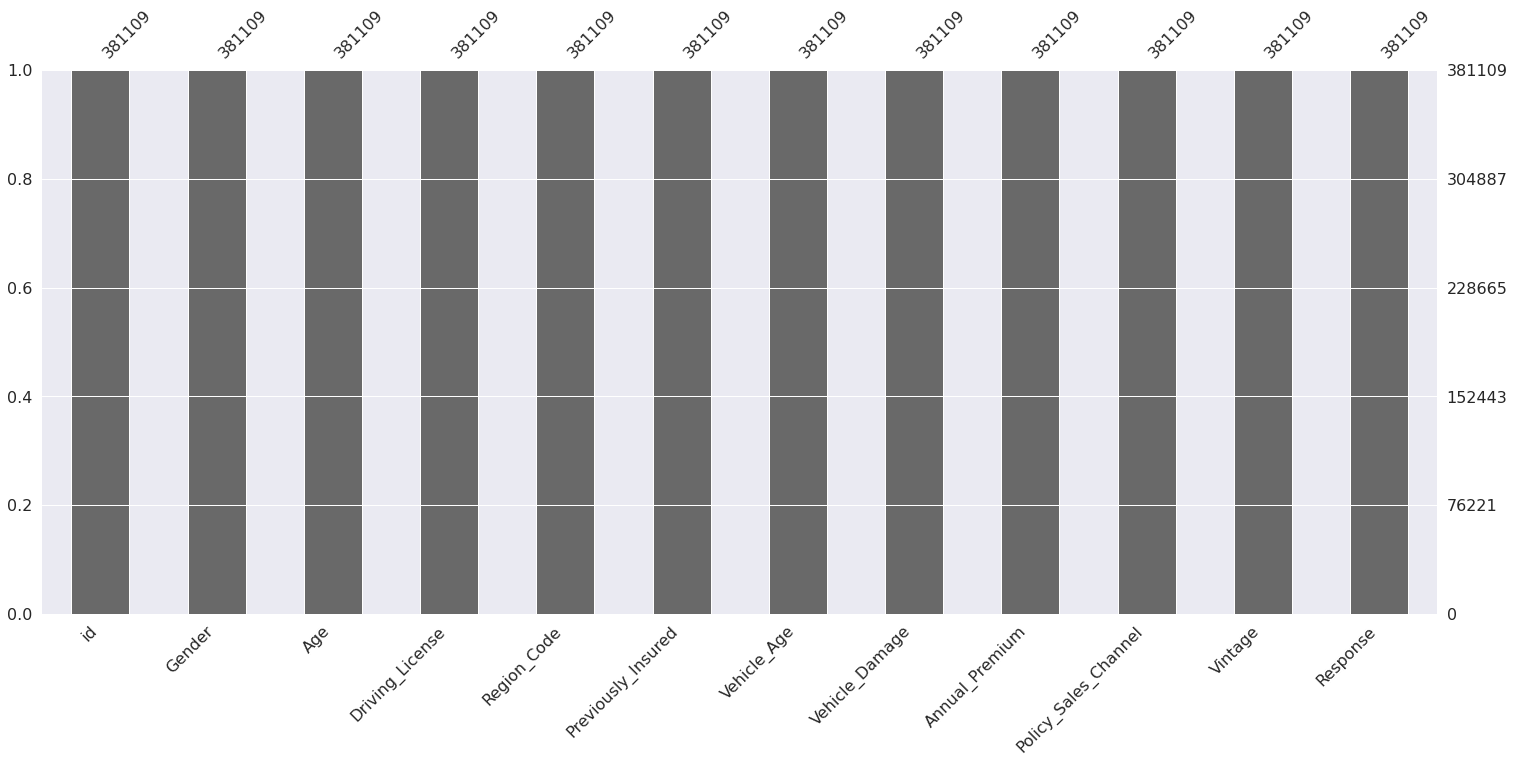

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(5,5))
msno.bar(data)
plt.show()

### What did you know about your dataset?

Health insurance data has 381109 observation and 12 variables.their is no null value and duplicate value prsent in dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description 

Id: Unique ID for the custome


Gender: Gender of the customer.

Age: Age of the customer.

Driving License: 0, customer does not have DL; 1, customer already has DL.

Region Code: Unique code for the region of the customer.

Previously Insured: 1, customer already has vehicle insurance; 0, customer doesn't have vehicle insurance.

Vehicle Age: Age of the vehicle.

Vehicle Damage: 1, customer got his/her vehicle damaged in the past; 0, customer didn't get his/her vehicle damaged in the past.

Anual Premium: The amount customer needs to pay as premium in the year.

Policy sales channel: Anonymized Code for the channel of outreaching to the 

customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, customer has been associated with the company.

Response: 1, customer is interested; 0, customer is not interested.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#1. Id
print(data["id"].unique())
print(data["id"].nunique())

[     1      2      3 ... 381107 381108 381109]
381109


In [ ]:
#2.Gender
print(data["Gender"].unique())

print(data["Gender"].nunique())

['Male' 'Female']
2


In [ ]:
#3.Age
print(data["Age"].unique())

print(data["Age"].nunique())

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
66


In [ ]:
#4.Driving_License
print(data["Driving_License"].unique())

print(data["Driving_License"].nunique())

[1 0]
2


In [ ]:
#5.Region_Code
print(data["Region_Code"].unique())

print(data["Region_Code"].nunique())

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
53


In [ ]:
#6.Previously_Insured
print(data["Previously_Insured"].unique())

print(data["Previously_Insured"].nunique())

[0 1]
2


In [ ]:
#7.Vehicle_Age
print(data["Vehicle_Age"].unique())

print(data["Vehicle_Age"].nunique())

['> 2 Years' '1-2 Year' '< 1 Year']
3


In [ ]:
#8.Vehicle_Damage
print(data["Vehicle_Damage"].unique())

print(data["Vehicle_Damage"].nunique())

['Yes' 'No']
2


In [ ]:
#9.Annual_Premium
print(data["Annual_Premium"].unique())

print(data["Annual_Premium"].nunique())

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]
48838


In [ ]:
#10.Policy_Sales_Channel
print(data["Policy_Sales_Channel"].unique())

print(data["Policy_Sales_Channel"].nunique())

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  58.
  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.  79.
 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144. 143.
  41.]
155


In [ ]:
#11.Vintage
print(data["Vintage"].unique())

print(data["Vintage"].nunique())

[217 183  27 203  39 176 249  72  28  80  46 289 221  15  58 147 256 299
 158 102 116 177 232  60 180  49  57 223 136 222 149 169  88 253 107 264
 233  45 184 251 153 186  71  34  83  12 246 141 216 130 282  73 171 283
 295 165  30 218  22  36  79  81 100  63 242 277  61 111 167  74 235 131
 243 248 114 281  62 189 139 138 209 254 291  68  92  52  78 156 247 275
  77 181 229 166  16  23  31 293 219  50 155  66 260  19 258 117 193 204
 212 144 234 206 228 125  29  18  84 230  54 123 101  86  13 237  85  98
  67 128  95  89  99 208 134 135 268 284 119 226 105 142 207 272 263  64
  40 245 163  24 265 202 259  91 106 190 162  33 194 287 292  69 239 132
 255 152 121 150 143 198 103 127 285 214 151 199  56  59 215 104 238 120
  21  32 270 211 200 197  11 213  93 113 178  10 290  94 231 296  47 122
 271 278 276  96 240 172 257 224 173 220 185  90  51 205  70 160 137 168
  87 118 288 126 241  82 227 115 164 236 286 244 108 274 201  97  25 174
 182 154  48  20  53  17 261  41 266  35 140 269 14

In [ ]:
#11.Response
print(data["Response"].unique())

print(data["Response"].nunique())

[1 0]
2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# drop id column
id = data['id']
data = data.drop('id',axis=1)


In [ ]:
#check data imbalance of target variable.
Response_count = data['Response'].value_counts()
print(Response_count)

0    334399
1     46710
Name: Response, dtype: int64


In [ ]:
#check Gender count in Dataset
Gender_count = data['Gender'].value_counts()
print(Gender_count)

Male      206089
Female    175020
Name: Gender, dtype: int64


In [ ]:
#check Response On Based on Driving licence
Driving_License_with_Response = data.groupby(['Driving_License', 'Response']).size().unstack()
print(Driving_License_with_Response)


Response              0      1
Driving_License               
0                   771     41
1                333628  46669


In [ ]:
Insurance_With_age = data.groupby('Age')['Response'].count().head(10)
print(Insurance_With_age)

Age
20     6232
21    16457
22    20964
23    24256
24    25960
25    20636
26    13535
27    10760
28     8974
29     7429
Name: Response, dtype: int64


In [ ]:
data['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [ ]:
Previously_Insured_Response = data.groupby(['Previously_Insured', 'Response']).size().unstack()
print(Previously_Insured_Response)


Response                 0      1
Previously_Insured               
0                   159929  46552
1                   174470    158


In [ ]:
Response_With_Genderv= data.groupby(['Gender', 'Response']).size().unstack()
print(Response_With_Genderv)

Response       0      1
Gender                 
Female    156835  18185
Male      177564  28525


In [ ]:
data.groupby(['Vehicle_Age', 'Response']).size().unstack()

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


In [ ]:
data.groupby(['Vehicle_Damage', 'Response']).size().unstack()

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


In [ ]:
data.stb.freq(['Gender'])

,Gender,count,percent,cumulative_count,cumulative_percent
0,Male,206089,54.07613,206089,54.07613
1,Female,175020,45.92387,381109,100.00000


In [ ]:
data.stb.freq(['Vehicle_Age'])

,Vehicle_Age,count,percent,cumulative_count,cumulative_percent
0,1-2 Year,200316,52.561341,200316,52.561341
1,< 1 Year,164786,43.238549,365102,95.799889
2,> 2 Years,16007,4.200111,381109,100.000000


In [ ]:
data.stb.freq(['Response'])

,Response,count,percent,cumulative_count,cumulative_percent
0,0,334399,87.743664,334399,87.743664
1,1,46710,12.256336,381109,100.000000


### What all manipulations have you done and insights you found?

1.The data set has 381109 variables and 12  records.
2. The dataset contain 54.07% male and 45.92% female.
3.Vehicle_Age varable contain age 1-2 year,less than 1 year and grater than 2 year.and it affect Response variable.
4.Dataset contain 87.74% No Response and only 12% yes Response.
5. Drop id column.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

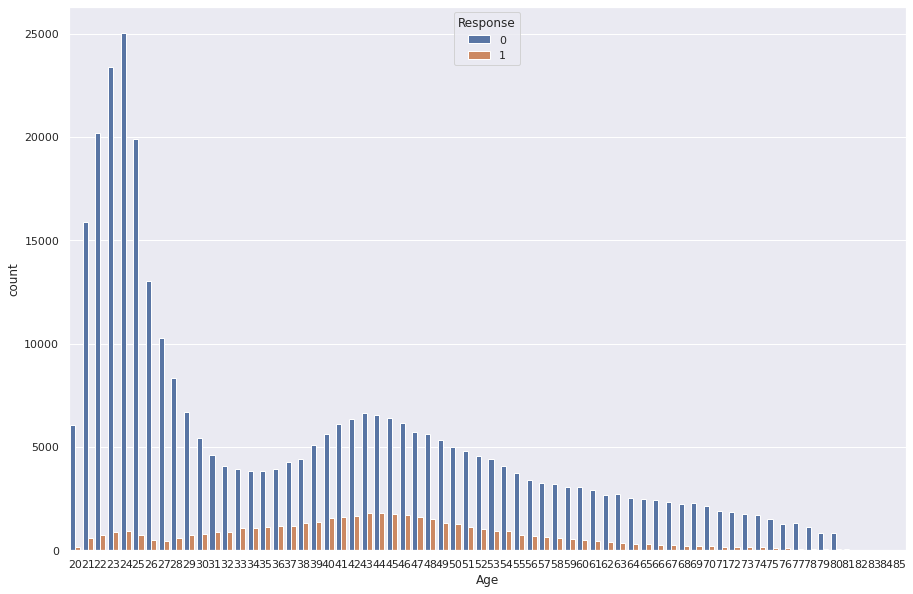

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,10))
sns.countplot(x='Age',hue='Response',data=data)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

1. People aged between 30-60 are more likely to be interested vehicle insurance.
2. People aged less than 30 are less interested in vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we can see the target people for business are most between age 30-60.

#### Chart - 2

<Figure size 720x576 with 0 Axes>

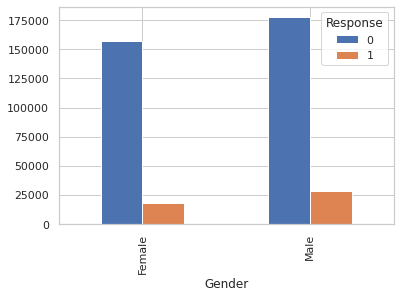

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
Response_With_Genderv.plot(kind = 'bar')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we can say that the no of male customers in our data set is higher than female customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because you can be approach male candidate.

#### Chart - 3

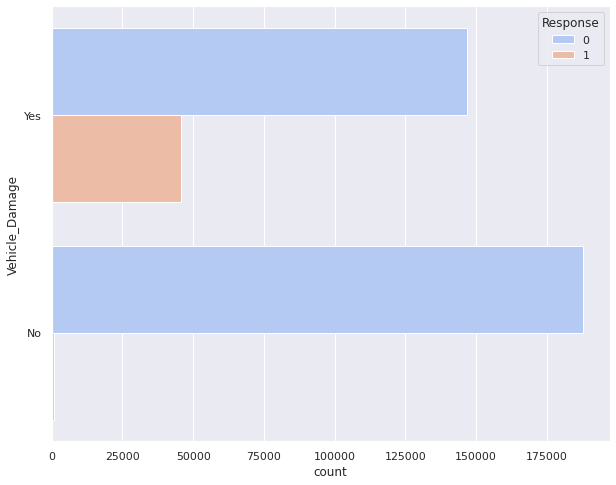

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(y ='Vehicle_Damage', hue = "Response", data = data,palette = 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Customers whose vehicle is NOT damaged are not interested for vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,Customers whose vehicle is damaged in past are going to be good custmers for business growth.

#### Chart - 4

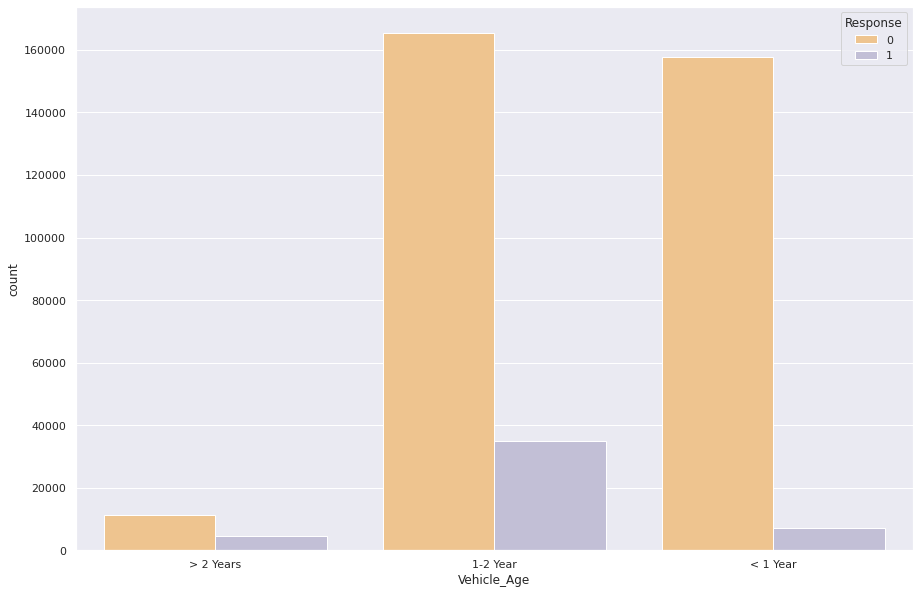

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette = 'PuOr')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

Customers with with Vehicle_Age >2 years have very less chance of buying Insurance .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because you can target new vehicle owners or directly contact to vehicle deelers for advertisement purpose.

#### Chart - 5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


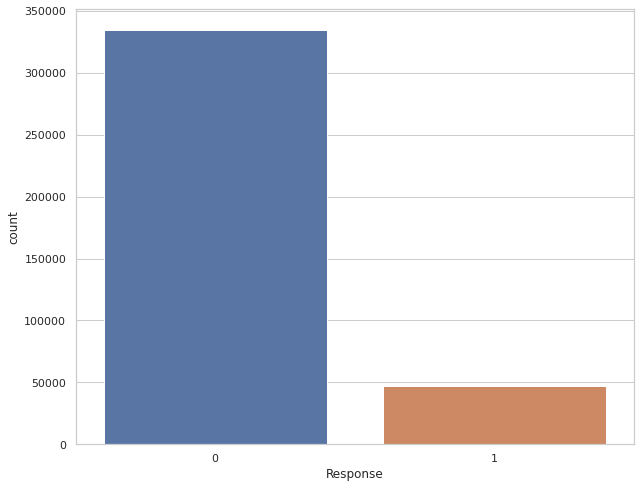

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(data['Response'],data=data)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Our dataset contain more zero(no) comparly one(yes).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 6

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


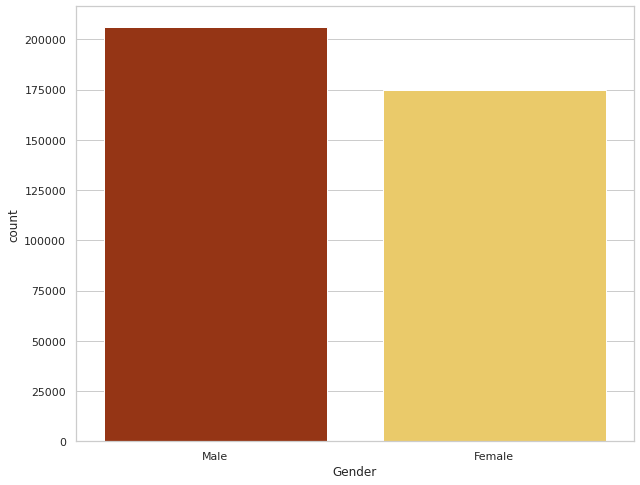

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,8))
sns.countplot(data['Gender'],data=data,palette = 'afmhot')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

The gender variable in the dataset is almost equally distributed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Figure size 1080x576 with 0 Axes>

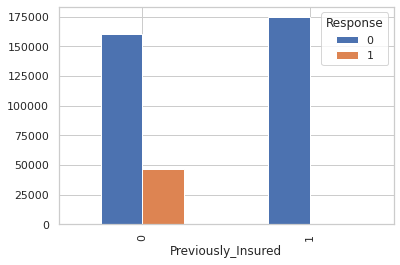

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
Previously_Insured_Response.plot(kind = 'bar')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Customer who are not perviosly insured are likely to be inetrested.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, our target peoples are new customers they are more likely to buy insurance.

#### Chart - 8

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


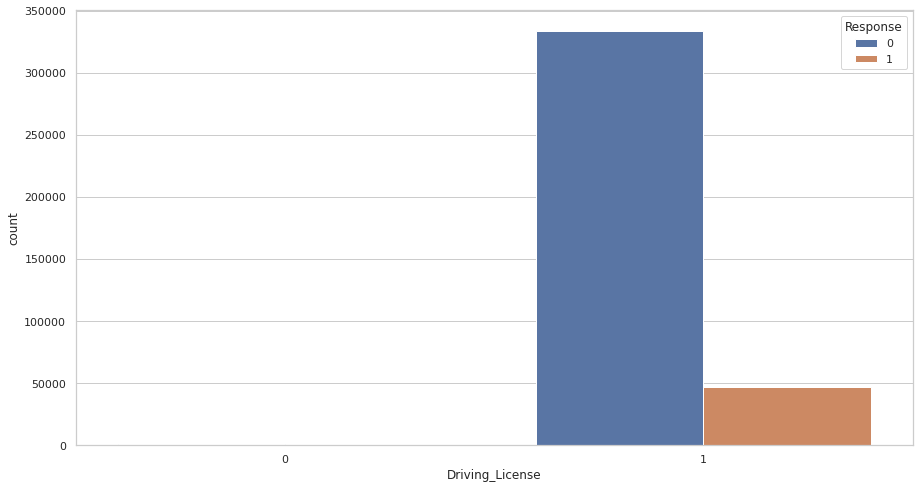

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(data['Driving_License'],hue=data['Response'])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Customers who are interested in Vehicle Insurance almost all have driving license.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, because we didnt think that these insight has positive or negative growth impact.

#### Chart - 9

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


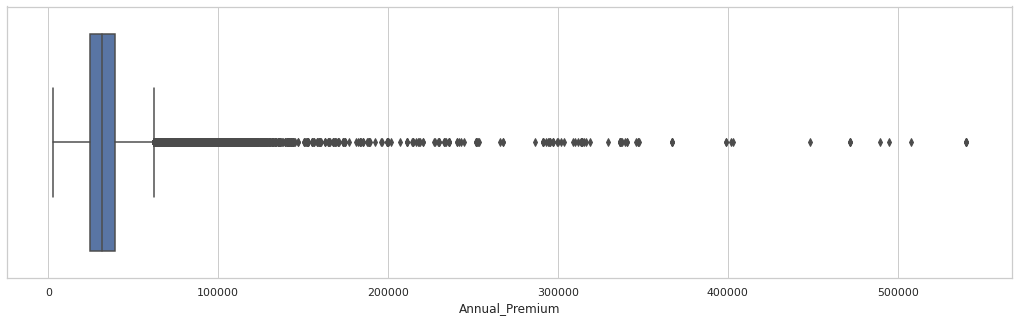

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (18, 5))
sns.boxplot(data['Annual_Premium'])
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values to findout the outliers.

##### 2. What is/are the insight(s) found from the chart?

Their is more outlier present in Annual_Premium variable of dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 10 - Correlation Heatmap

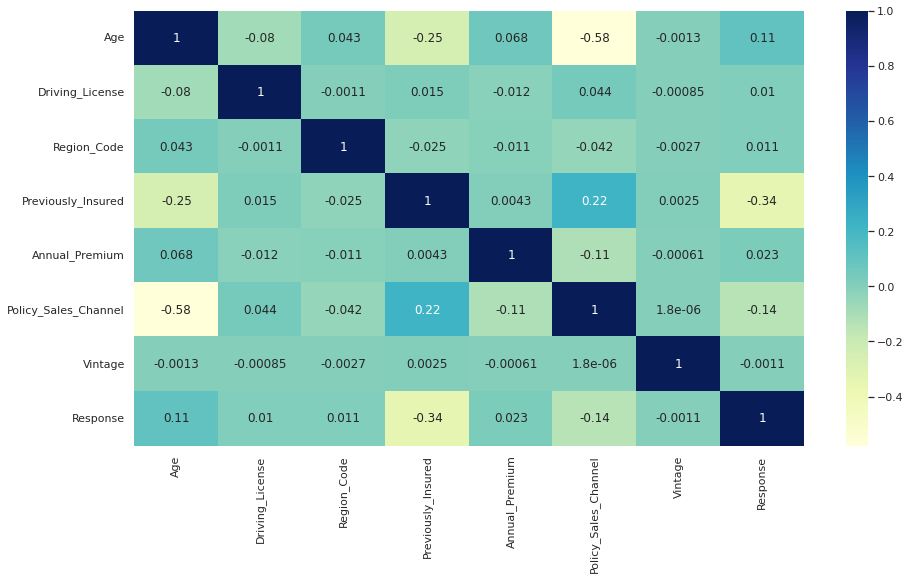

In [ ]:
# Correlation Heatmap visualization code
correlation = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

check for existence of corelation.

##### 2. What is/are the insight(s) found from the chart?

Vintage variable has no influence on Target variable (Responce).We can drop such variable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


1.The older the customer, greater is the possibility of wanting health insurance (Age between 30-60).

2.Previously_Insured is corelated with Response.

3.Vehicle Damage is Correlated with response.


In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 The older the customer, greater is the possibility of wanting health insurance (Age between 30-60).
Ho = 
Null Hypothesis: 30-60

Alternate Hypothesis : <30

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=data[(data["Response"]=="True") & (data["Age"]=="yes")]
# Getting the required parameter values for hypothesis testing
hypothesis_number = np.arange(30, 60, 1)
sample_mean = hypo_1["Age"].mean()
size = len(hypo_1)
std=(variance(hypo_1["Age"]))**0.5

In [ ]:
from numpy import math
from scipy.stats import norm

In [ ]:
# Perform Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="Age")
# Getting Conclusion
(conclusion(p.any()))


'Failed to reject the Null Hypothesis for p = True.'

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.
Customer with age 30-60 are more likely to interested purchase or apply for health Insurance.

##### Why did you choose the specific statistical test?

A z-test is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not. In particular, it tests whether two means are the same (the null hypothesis). A z-test can only be used if the population standard deviation is known and the sample size is 30 data points or larger

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Previously_Insured is corelated with Response.

#### 2. Perform an appropriate statistical test.

In [ ]:
dataset_table=pd.crosstab(data['Previously_Insured'],data['Response'])
print(dataset_table)
     

Response                 0      1
Previously_Insured               
0                   159929  46552
1                   174470    158


In [ ]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[159929  46552]
 [174470    158]]


In [ ]:
import scipy.stats as stats

In [ ]:
val=stats.chi2_contingency(dataset_table)
val


(44357.96472219977, 0.0, 1, array([[181173.99462883,  25307.00537117],
        [153225.00537117,  21402.99462883]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
     

Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 44360.05272134924


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
# Perform Statistical Test to obtain P-Value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


##### Which statistical test have you done to obtain P-Value?

I have used chi square test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.Previously_Insured is corelated with Response variable.Previously_Insured has influence on Target variable(Response).

##### Why did you choose the specific statistical test?

Because in our hypothesis we compair or we used two catagorical features,hence we used chi square test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Vehicle Damage is Correlated with response


#### 2. Perform an appropriate statistical test.

In [ ]:
dataset_table=pd.crosstab(data['Vehicle_Damage'],data['Response'])
print(dataset_table)

Response             0      1
Vehicle_Damage               
No              187714    982
Yes             146685  45728


In [ ]:
#Observed Values
Observed_Values_2 = dataset_table.values 
print("Observed Values :-\n",Observed_Values_2)

Observed Values :-
 [[187714    982]
 [146685  45728]]


In [ ]:
val_2=stats.chi2_contingency(dataset_table)
val_2

(47864.76180117493, 0.0, 1, array([[165568.78400668,  23127.21599332],
        [168830.21599332,  23582.78400668]]))

In [ ]:
Expected_Values_2=val_2[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values_2,Expected_Values_2)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 47866.92327853047


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:

# Perform Statistical Test to obtain P-Value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


##### Which statistical test have you done to obtain P-Value?

I have used chi square test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.Vehicle Damage is corelated with Response variable.Vehicle Damage has influence on Target variable(Response).

##### Why did you choose the specific statistical test?

Because in our hypothesis we compair or we used two catagorical features,hence we used chi square test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum().any()

False

#### What all missing value imputation techniques have you used and why did you use those techniques?

Their is no missing value in our dataset.

### 2. Handling Outliers

In [ ]:
data_copy = data.copy()

In [ ]:
# Handling Outliers & Outlier treatments
data_copy['Annual_Premium']
Q1 = data_copy.Annual_Premium.quantile(0.25)
Q3 = data_copy.Annual_Premium.quantile(0.75)
IQR = Q3 -Q1


In [ ]:
upper_limit = Q3 +1.5*IQR
lower_limit = Q1 -1.5*IQR
print(upper_limit)
print(lower_limit)

61892.5
1912.5


In [ ]:
data_no_outliers = data_copy[(data_copy.Annual_Premium >lower_limit ) &(data_copy.Annual_Premium <upper_limit)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set. Whereas the range gives you the spread of the whole data set, the interquartile range gives you the range of the middle half of a data set. We remove the record below and above the 25% and 75% as a outlier.

### 3. Categorical Encoding

In [ ]:
data_no_outliers['Vehicle_Age'] = data_no_outliers['Vehicle_Age'].replace(['> 2 Years','1-2 Year','< 1 Year'],[2,1,0])
data_no_outliers['Gender'] = data_no_outliers['Gender'].replace(['Male','Female'],[1,2])
data_no_outliers['Vehicle_Damage'] = data_no_outliers['Vehicle_Damage'].replace(['Yes','No'],[1,0])


In [ ]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                370789 non-null  int64  
 1   Age                   370789 non-null  int64  
 2   Driving_License       370789 non-null  int64  
 3   Region_Code           370789 non-null  float64
 4   Previously_Insured    370789 non-null  int64  
 5   Vehicle_Age           370789 non-null  int64  
 6   Vehicle_Damage        370789 non-null  int64  
 7   Annual_Premium        370789 non-null  float64
 8   Policy_Sales_Channel  370789 non-null  float64
 9   Vintage               370789 non-null  int64  
 10  Response              370789 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 33.9 MB


In [ ]:
data_no_outliers.shape

(370789, 11)

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding is used for categorical encoding.one-hot encoding comes in help because it transforms categorical data into numerical; in other words: it transforms strings into numbers so that we can apply our Machine Learning algorithms without any problems.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 1. Feature Selection

In [ ]:
X=data_no_outliers.drop(labels=['Response'], axis=1)
y=data_no_outliers['Response']

[0.00560847 0.15550352 0.00045577 0.1135799  0.05348781 0.01749777
 0.07753756 0.22772906 0.07443352 0.27416662]


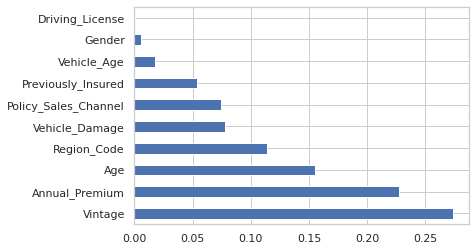

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()


In [ ]:
# Remove less important features
#x=X.drop(['Driving_License'],axis=1)
x=X.drop(['Driving_License','Gender'],axis=1)

##### What all feature selection methods have you used  and why?

Feature Importance with ExtraTreesClassifier

##### Do you think the dataset is imbalanced? Explain Why.

Yes,because in response variable the count of yes and no are 45155 and 325634 respectively. it clearly show imblance in dataset.

### 5. Handling Imbalanced Dataset

Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


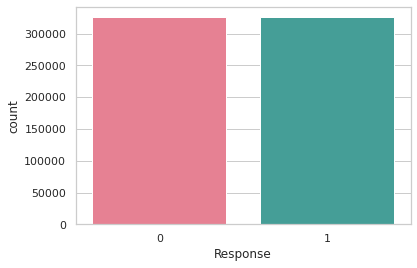

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_new,y_new = sm.fit_resample(x,y)
#Plot Response count
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE is a machine learning technique that solves problems that occur when using an imbalanced data set

##Data scaling

In [ ]:
#Scaling Numeric Data
from sklearn.preprocessing import MinMaxScaler
for df in [x_new]: 
    numeric_cols=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
    df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])


###6.Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.3, random_state = 11)

##### What data splitting ratio have you used and why? 

We  used ratio is 80:20, which means 80% of the data is for training and 20% for testing.The 80-20 rule prioritizes the 20% of factors that will produce the best results.The general point is that, in most cases, 80% of effects come from 20% of causes

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression

In [ ]:
# ML Model - 1 Implementation
model=LogisticRegression()
# Fit the Algorithm
model=model.fit(X_train,y_train)
# Predict on the model
y_pred_test=model.predict(X_test)

In [ ]:
# Predicted Probability
test_proba_model = model.predict_proba(X_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

print(confusion_matrix(y_test,y_pred_test))
print(accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
AUC_LR=roc_auc_score(y_test,y_pred_test)
print("ROC_AUC Score:",AUC_LR)

[[57726 39809]
 [ 3755 94091]]
0.7770305198560761
              precision    recall  f1-score   support

           0       0.94      0.59      0.73     97535
           1       0.70      0.96      0.81     97846

    accuracy                           0.78    195381
   macro avg       0.82      0.78      0.77    195381
weighted avg       0.82      0.78      0.77    195381

ROC_AUC Score: 0.77673622357492


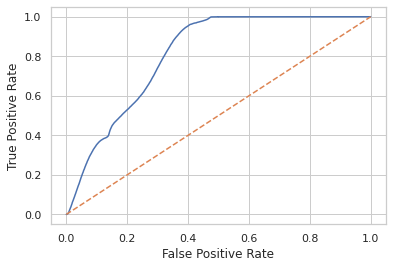

In [ ]:
from sklearn import metrics
#Roc_curve plot
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], ls="--")

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lg = LogisticRegression(class_weight='balanced')
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight': ['balanced'],
    'max_iter': [100, 500, 1000]
 } 
lg_gs = GridSearchCV(
   LogisticRegression(), 
    param_grid=params, scoring='f1', 
   cv=StratifiedKFold(n_splits=5)
 )
# Fit the Algorithm
lg_gs.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced'],
                         'max_iter': [100, 500, 1000]},
             scoring='f1')

In [ ]:
#best parameters
best_params = lg_gs.best_params_
best_params

{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100}

In [ ]:
#best estimeter
logreg_tuned = lg_gs.best_estimator_

In [ ]:
y_pred_train_tu=logreg_tuned.predict(X_train)
y_pred_test_tu=logreg_tuned.predict(X_test)

In [ ]:
# Predicted Probability
test_proba_tu = logreg_tuned.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test,y_pred_test_tu))
print(accuracy_score(y_test,y_pred_test_tu))
print(classification_report(y_test,y_pred_test_tu))
AUC_LR=roc_auc_score(y_pred_test_tu,y_test)
print("ROC_AUC Score:",AUC_LR)

[[57726 39809]
 [ 3755 94091]]
0.7770305198560761
              precision    recall  f1-score   support

           0       0.94      0.59      0.73     97535
           1       0.70      0.96      0.81     97846

    accuracy                           0.78    195381
   macro avg       0.82      0.78      0.77    195381
weighted avg       0.82      0.78      0.77    195381

ROC_AUC Score: 0.8208101311565695


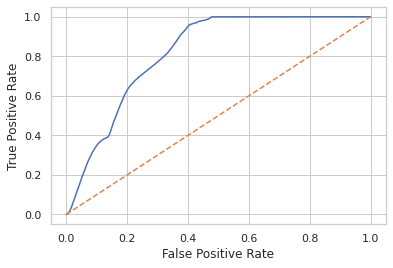

In [ ]:
#Roc_curve plot
y_score = logreg_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], ls="--")

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV.it used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Their is no imporivent after CV.

### ML Model - 2 Random Forest

In [ ]:
# ML Model - 2 Implementation
rf_model= RandomForestClassifier(class_weight='balanced',random_state=0)
# Fit the Algorithm
model_2=rf_model.fit(X_train,y_train)
# Predict on the model
y_pred_test = model_2.predict(X_test)

In [ ]:
# Predicted Probability
test_proba_rf = model_2.predict_proba(X_test)[:,1]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test,y_pred_test))
print(accuracy_score(y_pred_test,y_test))
print(classification_report(y_pred_test,y_test))
AUC_RF=roc_auc_score(y_pred_test,y_test)
print("ROC_AUC Score:",AUC_RF)

[[83753 13782]
 [ 8795 89051]]
0.884446286998224
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     92548
           1       0.91      0.87      0.89    102833

    accuracy                           0.88    195381
   macro avg       0.88      0.89      0.88    195381
weighted avg       0.89      0.88      0.88    195381

ROC_AUC Score: 0.8854725539142515


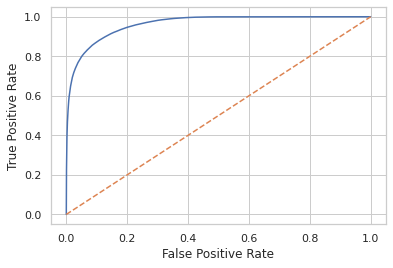

In [ ]:
#Roc_curve plot
y_score = model_2.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], ls="--")

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}
# Fit the Algorithm
rf_model= RandomForestClassifier(random_state=0)
gridRandomForest = GridSearchCV(estimator = rf_model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [ ]:
#best parameters
print('best_estimator: ', gridRandomForest.best_estimator_)
print('Score: ', gridRandomForest.best_score_)

best_estimator:  RandomForestClassifier(random_state=0)
Score:  0.8789195592559598


In [ ]:
# optimal model
rf_optimal= gridRandomForest.best_estimator_
#fit the model
rf_optimal.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Predict on the model
test_pred_rf = rf_optimal.predict(X_test)

In [ ]:
 # Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test,test_pred_rf))
print(accuracy_score(test_pred_rf,y_test))
print(classification_report(test_pred_rf,y_test))
AUC_RF=roc_auc_score(test_pred_rf,y_test)
print("ROC_AUC Score:",AUC_RF)

[[83666 13869]
 [ 8860 88986]]
0.8836683198468633
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     92526
           1       0.91      0.87      0.89    102855

    accuracy                           0.88    195381
   macro avg       0.88      0.88      0.88    195381
weighted avg       0.88      0.88      0.88    195381

ROC_AUC Score: 0.8847014112435914


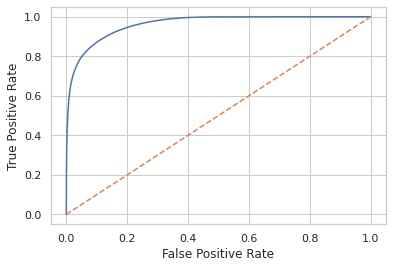

In [ ]:
#Roc_curve plot
y_score = rf_optimal.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], ls="--")

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Their is no improvment after cv.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

No, accuracy is same after cross validation.

### ML Model - 3 Decision Tree

In [ ]:
# ML Model - 3 Implementation Decision Tree
dt_clf =DecisionTreeClassifier(random_state=0)
# Fit the Algorithm
dt_clf=dt_clf.fit(X_train,y_train)
# Predict on the model
y_predict_dt = dt_clf.predict(X_test)

In [ ]:
# Predicted Probability
test_proba_dt= dt_clf.predict_proba(X_test)[:,1]

In [ ]:
# Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test,y_predict_dt))
print(accuracy_score(y_predict_dt,y_test))
print(classification_report(y_predict_dt,y_test))
AUC_LR=roc_auc_score(y_predict_dt,y_test)
print("ROC_AUC Score:",AUC_LR)

[[85086 12449]
 [10849 86997]]
0.8807560612342039
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     95935
           1       0.89      0.87      0.88     99446

    accuracy                           0.88    195381
   macro avg       0.88      0.88      0.88    195381
weighted avg       0.88      0.88      0.88    195381

ROC_AUC Score: 0.8808647486687443


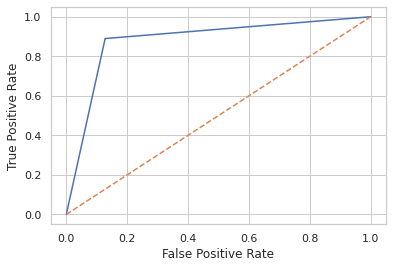

In [ ]:
#Roc_curve plot
y_score = dt_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], ls="--")

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DT_tuning = DecisionTreeClassifier()
dt_params = {"criterion": ['gini', 'entropy'],
             "max_depth": [5, 6, 7, 8],
             "min_samples_split": [10, 20, 40],
             "min_samples_leaf": [20, 40, 100],
             "max_features": ['auto', 'sqrt', 'log2']
              }

model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid = dt_params, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'roc_auc')

# Fit the Algorithm
model_DT_tuned.fit(X_train,y_train)
# optimal model
DT_tuned = model_DT_tuned.best_estimator_
# Predict on the model
test_pred_dt_tu = DT_tuned.predict(X_test)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
print('Algorithm: ', model_DT_tuned.best_estimator_)

Algorithm:  DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=100, min_samples_split=20)


In [ ]:
DT_tuned = DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_leaf=20,
                       min_samples_split=10,criterion='entropy')

In [ ]:
DT_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=20, min_samples_split=10)

In [ ]:
test_pred_dt_tu = DT_tuned.predict(X_test)

In [ ]:
print(accuracy_score(test_pred_dt_tu,y_test))

0.8239849320046473


In [ ]:
# Predicted Probability
test_proba_dt = DT_tuned.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test,test_pred_dt_tu))
print(accuracy_score(test_pred_dt_tu,y_test))
print(classification_report(test_pred_dt_tu,y_test))
AUC_LR=roc_auc_score(test_pred_dt_tu,y_test)
print("ROC_AUC Score:",AUC_LR)

[[71839 25696]
 [ 8694 89152]]
0.8239849320046473
              precision    recall  f1-score   support

           0       0.74      0.89      0.81     80533
           1       0.91      0.78      0.84    114848

    accuracy                           0.82    195381
   macro avg       0.82      0.83      0.82    195381
weighted avg       0.84      0.82      0.83    195381

ROC_AUC Score: 0.8341525260147081


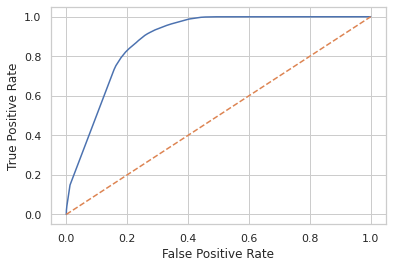

In [ ]:
#Roc_curve plot
y_score = DT_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], ls="--")

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes,before cross validation score is 0.88 and after cross validation score reduce to 0.82.it reduce the accuracy of model after cross validation.

### ML Model - 3 KNN




In [ ]:
# ML Model - 3 Implementation Decision Tree
knn = KNeighborsClassifier()
# Fit the Algorithm
knn_clf=knn.fit(X_train,y_train)
# Predict on the model
y_predict_knn = knn_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predict_knn))
print(accuracy_score(y_predict_knn,y_test))
print(classification_report(y_predict_knn,y_test))
AUC_LR=roc_auc_score(y_predict_knn,y_test)
print("ROC_AUC Score:",AUC_LR)

[[74531 23004]
 [10304 87542]]
0.829522829753149
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     84835
           1       0.89      0.79      0.84    110546

    accuracy                           0.83    195381
   macro avg       0.83      0.84      0.83    195381
weighted avg       0.84      0.83      0.83    195381

ROC_AUC Score: 0.835223164345505


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
knn_tu = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
# Fit the Algorithm
grid.fit(X_train,y_train)

In [ ]:
#best parameters and score.
grid.best_params_, grid.best_score_

({'n_neighbors': 5}, 0.813308998796989)

In [ ]:
#create knn classifier instand 
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
#fit the Algorithm
knn.fit(X_train, y_train)
# Predict on the model
knn_pred_tu = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,knn_pred_tu))
print(accuracy_score(knn_pred_tu,y_test))
print(classification_report(knn_pred_tu,y_test))
AUC_LR=roc_auc_score(knn_pred_tu,y_test)
print("ROC_AUC Score:",AUC_LR)

[[78077 19458]
 [13056 84790]]
0.8335866844780199
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     91133
           1       0.87      0.81      0.84    104248

    accuracy                           0.83    195381
   macro avg       0.83      0.84      0.83    195381
weighted avg       0.84      0.83      0.83    195381

ROC_AUC Score: 0.8350428971353923


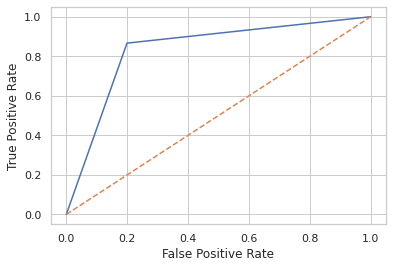

In [ ]:
#Roc_curve plot
y_score = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)

#create ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], ls="--")

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes,before cross valudation accuracy of model is 0.82 and after cross validation score is increase to 0.83.sum improvement done.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest because its accuracy is more than other models.its accuracy is 0.83.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=7ffeb39992ac7335a7b61530fd56d09257f80758457e9715c11b025e3377866f
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept -0.0786663332337092
Prediction_local [0.81072267]
Right: 0.78


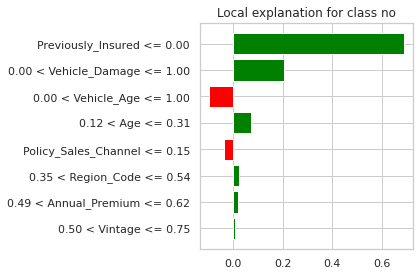

In [ ]:
import lime
from lime import lime_tabular
X_explain =X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=True,
                                                   class_names=["yes", "no"],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=11)

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_explain.values[0,:],rf_optimal.predict_proba, 
                                 num_features=10
                                 )
#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

Important feature according to our best model are as follow.

1.Previously_Insured 

2.Vehicle_Damag

3.Vehicle_Age 

4.Age

5.Policy_Sales_Channel 

This is top 5 best feature that influence the predictions(Response Variable).

# **Conclusion**

1.Customers of age between 30 to 60 are more likely to buy insurance.

2.Customers with Driving License have higher chance of buying Insurance.

3.Customers with Vehicle_Damage are likely to buy insurance.

4.The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.

5.comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.

6.Accuracy of random forest model is 0.88. It is more than other classification models.